In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

In [2]:
path = './selector_scan/oil_3_selectors/'
files = os.listdir(path)
GP = {}
KNN = {}
features = {}
for f in files:
    data = pickle.load(open(path+f, 'rb'))
#     GP = {**data['GP'], **GP}
    KNN = {**data['KNN'], **KNN}
    features = {**data['features'], **features}

In [3]:
# GP_list = [(v[0],v[1],k) for k,v in GP.items()]
KNN_list = [(v[0],v[1],k) for k,v in KNN.items()]
features_list = [(v[0],v[1],k) for k,v in features.items()]


In [4]:
# GP_list = sorted(GP_list, key=lambda x: x[0], reverse=True)
KNN_list = sorted(KNN_list, key=lambda x: x[0], reverse=True)
features_list = sorted(features_list, key=lambda x: x[0], reverse=True)

In [5]:
# GP_df = pd.DataFrame(GP_list, columns=['accuracy','standard_deviation', 'selectors'])
# GP_df.to_csv(path+'GP_selector_results.csv')
KNN_df = pd.DataFrame(KNN_list, columns=['accuracy','standard_deviation', 'selectors'])
KNN_df.to_csv(path+'KNN_selector_results.csv')
features_df = pd.DataFrame(features_list, columns=['accuracy','standard_deviation', 'selectors'])
features_df.to_csv(path+'features_selector_results.csv')

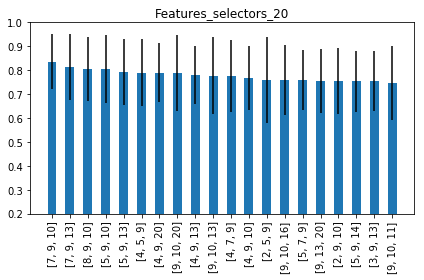

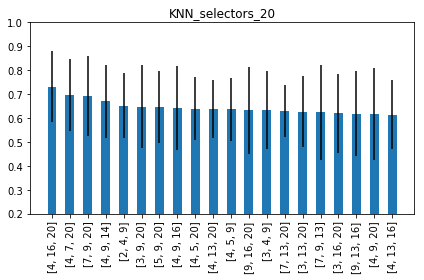

<Figure size 432x288 with 0 Axes>

In [6]:
def plot_heatmap(selector_list, save=False, name=None):
    acc_list = [ele[0] for ele in selector_list]
#     dist_lin = pdist(selector)
    dist_sq = squareform(acc_list)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(dist_sq)
    fig.colorbar(cax)
    if save:
        plt.savefig(path+name+'.png')

def plot_bar(selector_list, title, sub_set=False, sub_set_val=0, save=False):
    acc_list = [ele[0] for ele in selector_list]
    errors = [ele[1] for ele in selector_list]
    names = [ele[2] for ele in selector_list]
    if sub_set:
        title = title+'_'+str(sub_set_val)
        acc_list = acc_list[:sub_set_val]
        errors = errors[:sub_set_val]
        names = names[:sub_set_val]
    xs = [i for i in range(len(acc_list))]
    plt.bar(xs, acc_list, yerr=errors, width=0.5)
    ax = plt.gca()
    plt.title(title)
    ax.set_ylim([0.2,1])
    plt.xticks([i for i in range(len(acc_list))], names, rotation=90)
    plt.tight_layout()
    if save:
        plt.savefig(path+title+'.png')
    plt.show()
    plt.gcf().clear()
    
plot_bar(features_list, 'Features_selectors', sub_set=True, sub_set_val=20, save=True)
# plot_bar(GP_list, 'GP_selectors', sub_set=True, sub_set_val=20, save=True)
plot_bar(KNN_list, 'KNN_selectors', sub_set=True, sub_set_val=20, save=True)

In [8]:
across_classifiers = {name[2]:[i] for i,name in enumerate(GP_list)}
for i, name in enumerate(KNN_list):
    across_classifiers[name[2]].append(i)
for i, name in enumerate(features_list):
    across_classifiers[name[2]].append(i)
score_selectors = {(sum(across_classifiers[ele]),ele) for ele in across_classifiers}
score_selectors = sorted(score_selectors, key=lambda x: x[0])


ranksum_df = pd.DataFrame({'selector_combo':[s[1] for s in score_selectors],'rank_sum':[s[0] for s in score_selectors]})
ranksum_df.to_csv(path+'rank_sum_results.csv')

length = 20
xs = [i for i in range(length)]
value_names = score_selectors[:length]
values = [sel[0] for sel in value_names]
names = [sel[1] for sel in value_names]
plt.bar(xs, values, width=0.5)
plt.title('lowest rank-sum selectors')
plt.xticks(xs, names, rotation=90)
plt.tight_layout()
plt.savefig(path+'lowest_rank_sum_5_selectors_3_cheese.png')
plt.show()

NameError: name 'across_classifiers' is not defined

15504


<Figure size 144x144 with 0 Axes>

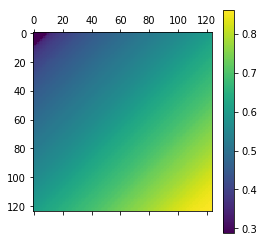

In [10]:
# [[0,0],[0,1],[1,0],[2,0],[1,1],[0,2],[3,0][2,1],[1,2],[0,3]]
# import itertools
# list(itertools.permutations([1,0]))
from itertools import product
import numpy as np
import matplotlib.pyplot as plt
matrix_size= 124 # 70 for the 4 selectors, 34 for the 3 selectors
indicies = list(product(range(matrix_size), repeat=2))
indicies = sorted(indicies, key=lambda x:x[0]+x[1])
sorted_mat = np.zeros((matrix_size,matrix_size))


features_acc = [ele[0] for ele in features_list]
features_acc = sorted(features_acc)
print(len(features_acc))
#1156 is a 34 x 34 matrix so pad with 16 zeros
# zeroes = [0 for i in range(16)]
zeroes = [features_acc[0] for i in range(55)]

features_acc = zeroes + features_acc
fig = plt.figure(figsize=(2,2))
for ele, index in zip(features_acc, indicies):
    sorted_mat[index] = ele
plt.matshow(sorted_mat)
plt.colorbar()
title = '5_cheese_diag_sorted_matrix_selectors'
plt.savefig(path+title+'.png')
plt.show()


